# Homework 2

## Task 1
* Demographic parity: $$\frac{P(\hat{Y} = 1|A=Blue)}{P(\hat{Y} = 1|A=Red)} = \frac{0.65}{0.5}=1.3$$ The "four-fifth" rule is violated, people from the Blue group have a greater chance of getting into XAI training (should be between 0.8 and 1.25).

* Equal opportunity: $$\frac{P(\hat{Y} = 1|A=Blue, Y=1)}{P(\hat{Y}=1|A=Red, Y=1)} = \frac{60/(60+20)}{0.5} = 1.5$$ Should be close to $1$, so it is not true, that if two people from groups Red and group B will find XAI skills useful in the future, then they have equal chance to getting into training.

* Predictive rate parity: $$\frac{P(Y=1|A=Blue, \hat{Y}=1)}{P(Y=1|A=Red, \hat{Y}=1)} = \frac{60/65}{0.5} = \frac{120}{65} \approx 1,85 $$
Also should be close to $1$

*Starred task: How can this decision rule be changed to improve its fairness?*
We can increase number of people from the Red group allowed to attend the training.


## Task 2
* Train a model for the selected dataset.
For the first model I trained Random Forest Classifier on the Adult income dataset. The model achieved accuracy of ~86% and not bad F1 score of 68%.

* For the selected protected attribute (age, gender, race) calculate the following fairness coefficients: Statistical parity, Equal opportunity, Predictive parity. 
    Fairness coefficients for the gender attribute:

    Statistical parity = 0.246862

    The model is heavily biased in terms of statistical parity: women are much less likely to be predicated with high income.

    Equal opportunity = 0.746388

    Predictive parity = 1.068475

    In terms of above two coefficients, the model is relatively fair.
    
    ![image](rf.png)

* Train another model (different hyperparameters, feature transformations etc.) and see how the coefficients Statistical parity, Equal opportunity, Predictive parity behave for it.

    I chose Logistic Regression for the second model.

    Statistical parity = 0.543689

    It's better than in the random forest model, but it's still biased.

    Equal opportunity = 1.121673

    Predictive parity = 0.720839
    
    Logistic regresion is better in terms of equal opportunity, but shows higher bias in terms of predictive parity.
    
    ![image](lr.png)
    
* Apply the selected bias mitigation technique on the first model. Check how Statistical parity, Equal opportunity, Predictive parity coefficients behave after this correction.

    Statistical parity = 0.573604

    Equal opportunity = 1.294659

    Predictive parity = 0.790244
    
    It improves on the first model in terms of statistical parity, but is less fair in predictive parity.
    
    ![image](rfw.png)

* Compare the quality (performance) of the three models with their fairness coefficients. Is there any correlation?

    ![image](comp.png)

    |                          | accuracy | f1       | statistical parity | equal opportinity | predictive parity |
    |--------------------------|----------|----------|--------------------|-------------------|-------------------|
    | Random Forest            | 0.867058 | 0.678017 | 0.543689           | 1.121673          | 0.720839          |
    | Logistic Regression      | 0.804545 | 0.390119 | 0.543689           | 1.121673          | 0.720839          |
    | Random Forest (reweight) | 0.862008 | 0.657172 | 0.573604           | 1.294659          | 0.790244          |
    
    I wouldn't say that there's any correlation, maybe just that acccuracy is slightly decreasing with model becoming more fair, but I wouldn't say it's conclusive.

# Appendix

### 1. Data loading and preprocessing

In [42]:
import numpy as np
# import matplotlib.pyplot as plt
import pandas as pd
import dalex as dx
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# from sklearn import metrics
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.linear_model import LogisticRegression

In [31]:
data = pd.read_csv('adult.csv').dropna()

In [32]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [33]:
data.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [34]:
data['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [35]:
education_levels = {
    "Preschool": 1,
    "1st-4th": 2,
    "5th-6th": 3,
    "7th-8th": 4,
    "9th": 5,
    "10th": 6,
    "11th": 7,
    "12th": 8,
    "Some-college": 9,
    "HS-grad": 10,
    "Assoc-acdm": 11,
    "Assoc-voc": 12,
    "Bachelors": 13,
    "Masters": 14,
    "Doctorate": 15,
    "Prof-school": 16
}

In [36]:
# encode categorical features, some are dropped because one hot encoding would increase number of features too much

data['gender'] = data['gender'].apply(lambda x: 1 if x == 'Male' else 0)
data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)
data['native-country'] = data['native-country'].apply(lambda x: 1 if x == 'United-States' else 0)
data['education'] = data['education'].apply(lambda x: education_levels[x])

# data.drop(columns=['pickup_datetime', 'dropoff_datetime', 'pickup_zip', 'dropoff_zip'], inplace=True)

categorical_vars = ['workclass', 'marital-status', 'occupation', 'relationship', 'race']
encoder = OneHotEncoder()
cat_encoded = encoder.fit_transform(data[categorical_vars])

cat_encoded_array = cat_encoded.toarray()
cat_encoded_df = pd.DataFrame(cat_encoded_array, columns=encoder.get_feature_names_out(categorical_vars))
data.drop(columns=categorical_vars, inplace=True)
data = pd.concat([data, cat_encoded_df], axis=1)

## 2. Model training and evaluation

In [38]:
X = data.drop(['income'], axis=1)
y = data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [39]:
model1 = RandomForestClassifier(n_estimators=100, min_weight_fraction_leaf=0.001)
model1.fit(X_train, y_train)

RandomForestClassifier(min_weight_fraction_leaf=0.001)

In [44]:
def pf_xgboost_classifier_categorical(model, df):
    df.loc[:, df.dtypes == 'object'] =\
        df.select_dtypes(['object'])\
        .apply(lambda x: x.astype('category'))
    return model.predict_proba(df)[:, 1]

explainer = dx.Explainer(model1, X_test, y_test, predict_function=pf_xgboost_classifier_categorical, label="RF_default")
explainer.model_performance()

Preparation of a new explainer is initiated

  -> data              : 14653 rows 51 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 14653 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RF_default
  -> predict function  : <function pf_xgboost_classifier_categorical at 0x7f4db427f560> will be used
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.0, mean = 0.237, max = 0.971
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.913, mean = -0.00377, max = 0.993
  -> model_info        : package sklearn

A new explainer has been created!


,recall,precision,f1,accuracy,auc
RF_default,0.599708,0.779848,0.678017,0.867058,0.918866


In [66]:
protected_variable = X_test.gender
privileged_group = 1

fobject = explainer.model_fairness(
    protected=protected_variable,
    privileged=privileged_group
)

In [67]:
fobject.fairness_check()

Bias detected in 3 metrics: TPR, FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on '1'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
        TPR       ACC       PPV       FPR       STP
0  0.746388  1.119904  1.068475  0.142857  0.246862


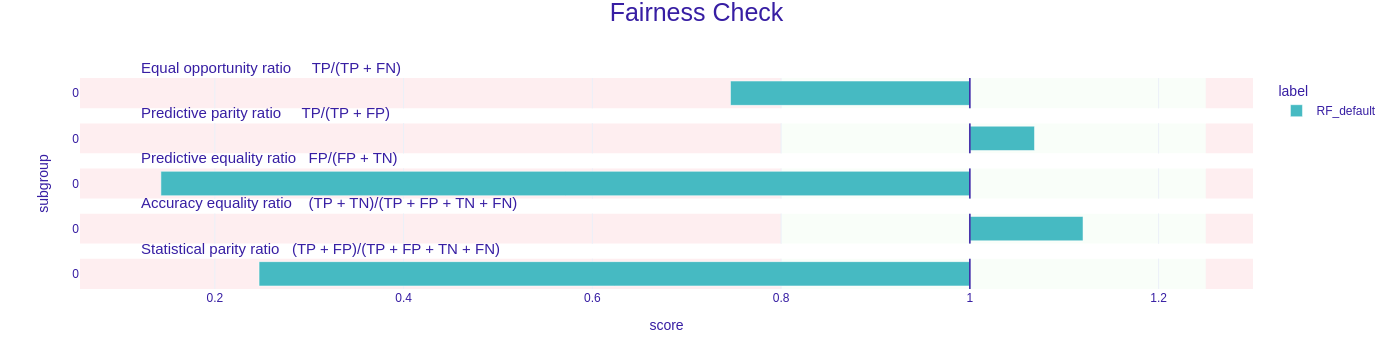

In [68]:
fobject.plot()

## 3. Training and evaluation of the second model

In [51]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [70]:
explainer2 = dx.Explainer(model2, X_test, y_test, predict_function=pf_xgboost_classifier_categorical, label="LR_default")
explainer2.model_performance()

Preparation of a new explainer is initiated

  -> data              : 14653 rows 51 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 14653 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : LR_default
  -> predict function  : <function pf_xgboost_classifier_categorical at 0x7f4db427f560> will be used
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.00267, mean = 0.272, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.0383, max = 0.994
  -> model_info        : package sklearn

A new explainer has been created!


,recall,precision,f1,accuracy,auc
LR_default,0.267836,0.717868,0.390119,0.804545,0.578128


In [71]:
fobject2 = explainer2.model_fairness(
    protected=protected_variable,
    privileged=privileged_group
)
fobject2.fairness_check()

Bias detected in 3 metrics: PPV, FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on '1'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
        TPR       ACC       PPV  FPR       STP
0  1.121673  1.190225  0.720839  0.8  0.543689


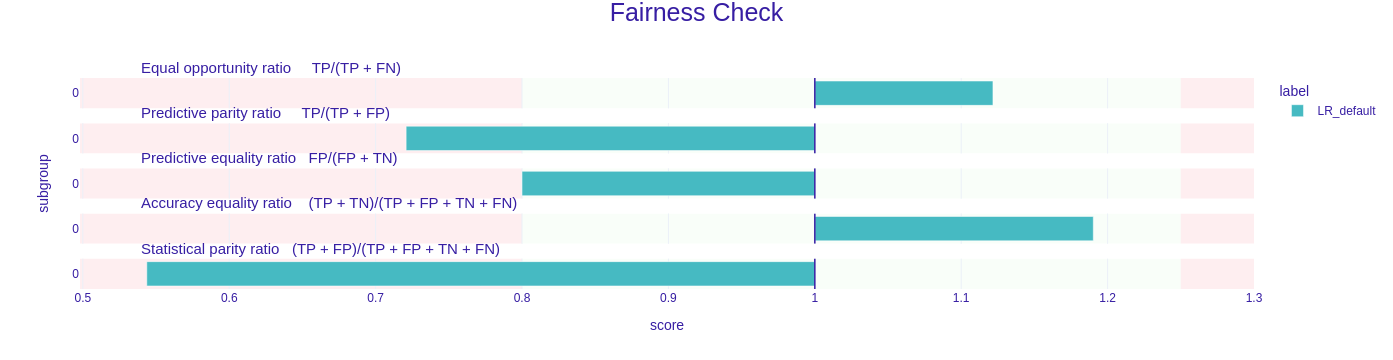

In [72]:
fobject2.plot()

## 4. Apply the selected bias mitigation technique on the first model.

In [60]:
from dalex.fairness import resample, reweight, roc_pivot
from copy import copy

protected_variable_train = X_train.gender

sample_weight = reweight(
    protected_variable_train, 
    y_train, 
    verbose=False
)

model_reweight = copy(model1)
model_reweight.fit(X_train, y_train, sample_weight=sample_weight)

explainer_reweight = dx.Explainer(
    model_reweight, 
    X_test, 
    y_test, 
    predict_function=pf_xgboost_classifier_categorical,
    label='Model with reweight mitigation',
    verbose=False
)
fobject_reweight = explainer_reweight.model_fairness(
    protected_variable, 
    privileged_group
)

In [79]:
explainer_reweight.model_performance()

,recall,precision,f1,accuracy,auc
Model with reweight mitigation,0.566667,0.782082,0.657172,0.862008,0.912712


In [61]:
fobject_reweight.fairness_check()

Bias detected in 3 metrics: TPR, PPV, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on '1'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
        TPR       ACC       PPV   FPR       STP
0  1.294659  1.120627  0.790244  0.88  0.573604


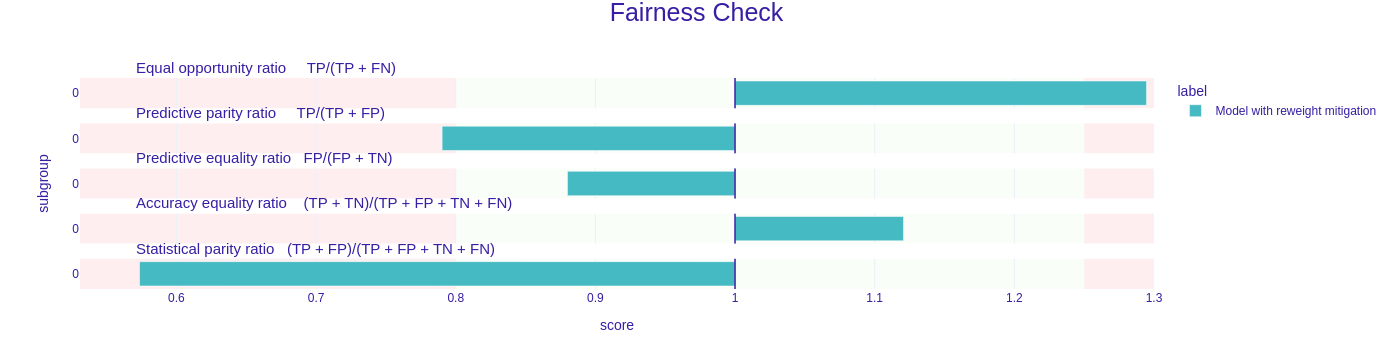

In [62]:
fobject_reweight.plot()

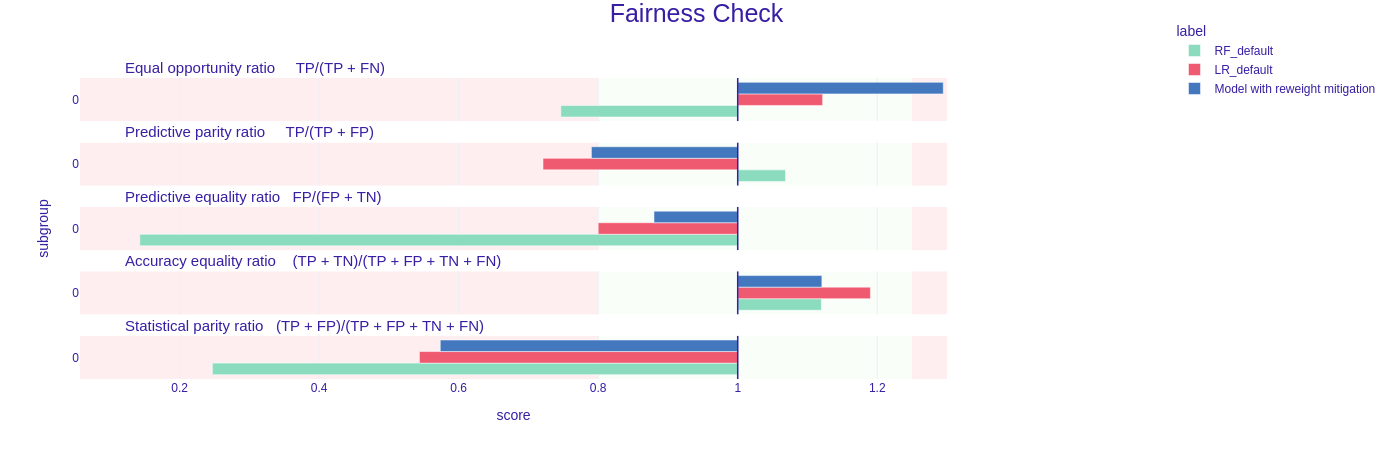

In [78]:
fobject.plot([fobject2, fobject_reweight], show=False).\
    update_layout(autosize=False, width=1000, height=450, legend=dict(yanchor="top", y=1.2, xanchor="right", x=1.5))